In [ ]:
#import modules

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#import the student_scores data set ans use df head to view data

df=pd.read_csv("student_scores.csv")

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [ ]:
#Now we will info to tell us about the data

df.info()

#it will gives us information on the columns and rows in the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [ ]:
#We will use describe to convert rows into statistics

df.describe()

#This helpd us get an overall mathmatical depiction of our dataset in tableuer form

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


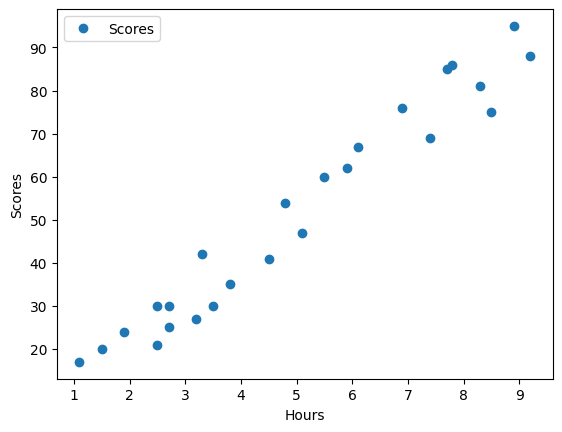

In [ ]:
#Now lets run a scatter plot comparing the data points we want to use
#We want x= Hours and y= Scores
df.plot(x='Hours',y='Scores',style='o')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.ticklabel_format(axis="y", style="plain")
plt.show()

#The image below shows us the correlation of our data

#From face value we can see the data comparision is linear

In [ ]:
#Our independant value that we will measure Score against will be Hours
#So we will put that in the X variable which will be used as our X-Axis
X = df[['Hours']]

In [ ]:
#We put X into a dataframe so we want to check the type to make sure
type(X)
#it is a dataframe

pandas.core.frame.DataFrame

In [ ]:
#Our dependant value or the predictor value will be Scores
#So we will put that in the Y variable which will be used as our Y-Axis
y=df['Scores']

In [ ]:
#Now we are going to check the type to make sure it is a series
type(y)
#The type is a series

pandas.core.series.Series

In [ ]:
#import train_test_split from scikit learn
from sklearn.model_selection import train_test_split

In [ ]:
#Now we need to split and train our data
#Train test split is used to evaluate the performance of a Machine Leaning model
#The Train label for X & y is used for training the model with the correct inputs and labels we are looking for
#While the test is going to be another aggregated dataset that will be filtered through the model and it will make predictions on that data
#we want the model to be as robust as possible
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.25,random_state=0)

In [ ]:
#import Linear Regression model from scikit learn
from sklearn.linear_model import LinearRegression

In [ ]:
#Here we are going to bring in our linear Regression model and start fitting the data and training the model
#Linear regression model is used when you want to predict an out come on data
#with simple linear regression you are comparing two data point(X,y) and it will predict the values for you
lr = LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
#The .predict() helps us predict the values that were on the trained model
y_pred = lr.predict(X_test)

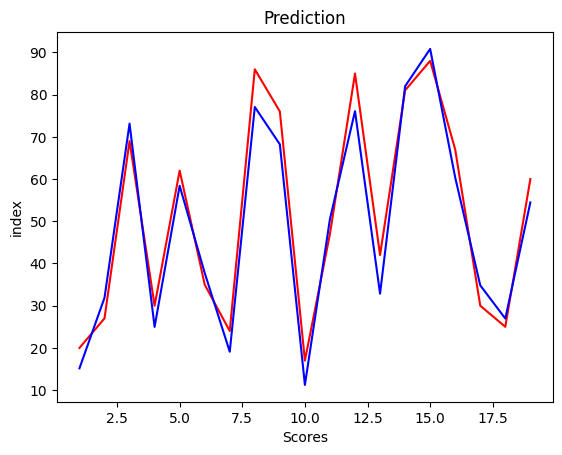

In [ ]:
#plot actual vs predicted
#Here we are comparing the test data set(Which is the correct data and labels) and the prediction dataset for price

c = [i for i in range (1,len(y_test)+1,1)]

plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Scores')
plt.ylabel('index')
plt.title('Prediction')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

#Our prediction data is in blue
#Our historical or training set is in red

#you can see that the values predicted seem to be right inline with the historical values
#This is a good sign!


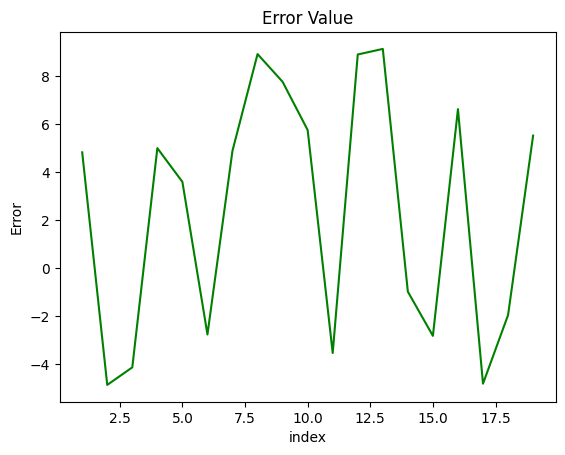

In [ ]:
# plotting the error
#Here we are plotting the errorr values that were in the predicted set
c = [i for i in range(1,len(y_test)+1,1)]
plt.plot(c,y_test-y_pred,color='green',linestyle='-')
plt.xlabel('index')
plt.ylabel('Error')
plt.title('Error Value')
plt.ticklabel_format(axis="y", style="plain")
plt.show()

In [ ]:
#Accuracy metrics from scikit learn
from sklearn import metrics
#MAE definition:is a measure of the average size of the mistakes in a collection of predictions, without taking their direction into account
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
#MSE: measures how close a regression line is to a set of data points.
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
#is one of the most commonly used measures for evaluating the quality of predictions. It shows how far predictions fall from measured true values
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r square :' , metrics.r2_score(y_test, y_pred))

#r-squared shows how well the data fit the regression model
#a good r-squared values is between 0.50 to 0.99
#This output is above that at a 0.94 that is very good!

Mean Absolute Error: 5.102025407722985
Mean Squared Error: 31.249552089861744
Root Mean Squared Error: 5.5901298813052405
r square : 0.9478707230647945


In [ ]:
# Intercept and coefficient of the line
print('Intercept of the model:',lr.intercept_)
print('Coefficient of the line:',lr.coef_)

Intercept of the model: 0.42760522121224653
Coefficient of the line: [9.8255288]


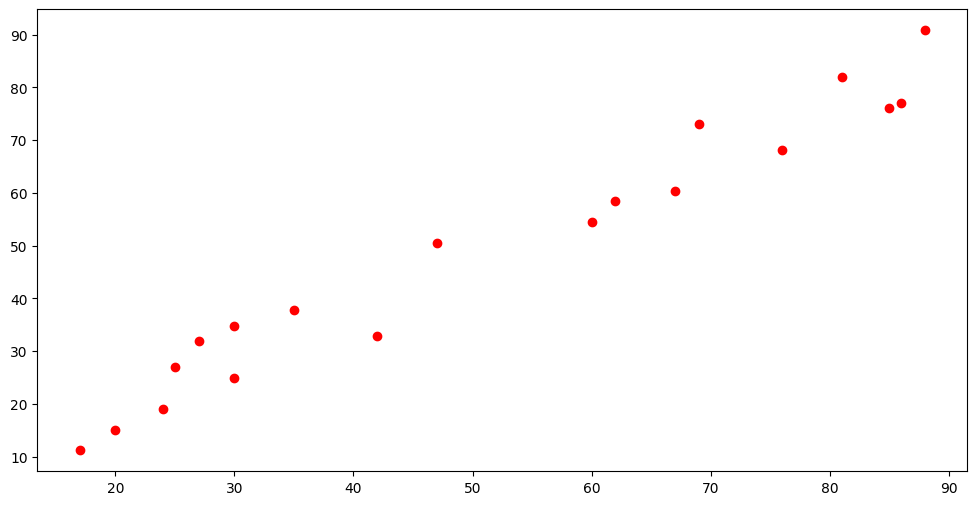

In [ ]:
# Plot actual and predicted values
plt.figure(figsize=(12,6))
plt.scatter(y_test,y_pred,color='r',linestyle='-')
plt.ticklabel_format(axis="y", style="plain")
plt.ticklabel_format(axis="x", style="plain")
plt.show()